In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

/Applications/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def fashion_data():
    fashion_mnist = keras.datasets.fashion_mnist
    
    (train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()
    
    return (train_images, train_labels),(test_images, test_labels)

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()


In [12]:
print("train_labels:", train_labels)
print("train_labels_len:", len(train_labels))
print("train_images:", train_images.shape)
print("test_images:", test_images.shape)
print("test_labels_len:", len(test_labels))

train_labels: [9 0 0 ... 3 0 5]
train_labels_len: 60000
train_images: (60000, 28, 28)
test_images: (10000, 28, 28)
test_labels_len: 10000


In [9]:
# 每张图像都映射到一个标签，由于数据集中不包含类别名称，故将它们存储在此处
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', \
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

<h3>预处理数据</h3>


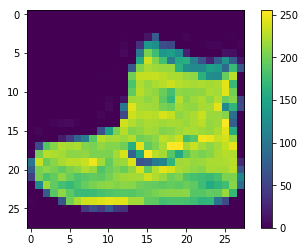

In [18]:
# 像素值介于0到255之间
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [19]:
# 将这些值缩小到0到1之间，将数据类型从整数转换为浮点数。务必要以相同的方式对训练集和测试集进行预处理
train_images = train_images/255.0
test_images = test_images/255.0

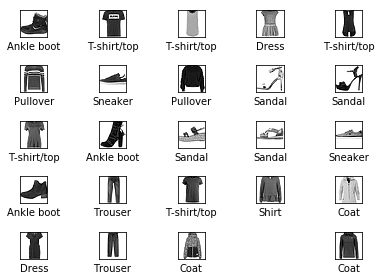

In [39]:
# 显示前25张图，并显示类别名称，确认数据无误
plt.Figure()
for i in range(25):
    plt.subplot(5, 5, i+1)

    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.tight_layout()
#     plt.subplots_adjust(top=0.9)


## 构建模型
构建神经网络，需要先配置模型的层，然后再编译模型
### 设置层
神经网络的基本构造是层。层从馈送到其中的数据中提取表示结果。
<font color=red>大部分深度学习都会把简单的层连在一起。</font>大部分层都具有在训练期间要学习的参数

In [40]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

### 编译模型
模型还需要再进行几项设置才可以开始训练。这些设置会添加到模型的编译步骤：
* 损失函数-衡量模型在训练期间的准确率。“引导”模型朝着正确的方向优化
* 优化器-根据模型看到的数据及其损失函数更新模型的方式
* 指标-用于监控训练和测试步骤。以下使用准确率，即图像被正确分类的比例

In [41]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

### 训练模型
训练神经网络模型需要执行以下步骤：
* 1.将训练数据馈送到模型中，train_images和train_labels数组
* 2.模型学习将图像与标签相关联
* 3.将模型与测试集进行预测

In [42]:
# 调用model.fit 方法， 使模型与训练数据“拟合”
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.4998 - acc: 0.8255
Epoch 2/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.3749 - acc: 0.8649
Epoch 3/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.3389 - acc: 0.8762
Epoch 4/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.3132 - acc: 0.8851
Epoch 5/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.2945 - acc: 0.8905


### 评估准确率

In [43]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

10000/10000 [==============================] - 0s 45us/step
Test accuracy: 0.8761


<font color=red>模型测试数据集上的准确率略低于在训练数据集上的准确率。</font>  
训练准确率和测试准确率之间的差异表示出现过拟合。  
如果机器学习模型在新数据集上的表现不如在训练集上的表象，表示出现过拟合

### 做出预测
<font color=red>使用模型对一些图像进行预测</font>

In [44]:
predictions = model.predict(test_images)

In [45]:
predictions[0]

array([2.6233980e-05, 2.5896981e-07, 2.7534418e-06, 5.1904724e-08,
       7.0870424e-06, 1.5398111e-02, 2.0811558e-06, 3.5699248e-02,
       5.5599656e-05, 9.4880855e-01], dtype=float32)

预测结果是一个具有10个数字的数组。   
这些数字说明模型对于图像对应于10种不同服饰中每个服饰的“置信度”。   
可以查看哪个标签的置信度最大：

In [46]:
np.argmax(predictions[0])

9

In [47]:
# 查看测试标签
test_labels[0]

9